#                                      Data Science Intern at LetsGrowMore

###       Task     :      2)Prediction using Decision Tree Algorithm
###        Level   :      INTERMADIATE LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [1]:
#import neccesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

### Load the data

In [2]:
#importing dataset
data=pd.read_csv(r"S:\Projects\LGMVIP- DataScience\2.Prediction using Decision Tree\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Understanding

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data=data.drop('Id',axis=1)

#### Cheacking Null values

In [9]:
data.isnull().sum() #No null values present

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA

In [10]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Scatter plot

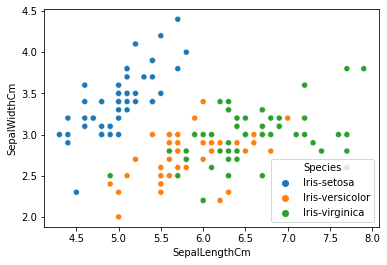

In [13]:
#Scatter plot for sepal
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')
plt.show()

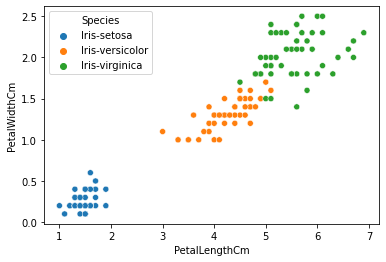

In [14]:
#scatter plot for petal
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data,hue='Species')
plt.show()

#### Pair Plot

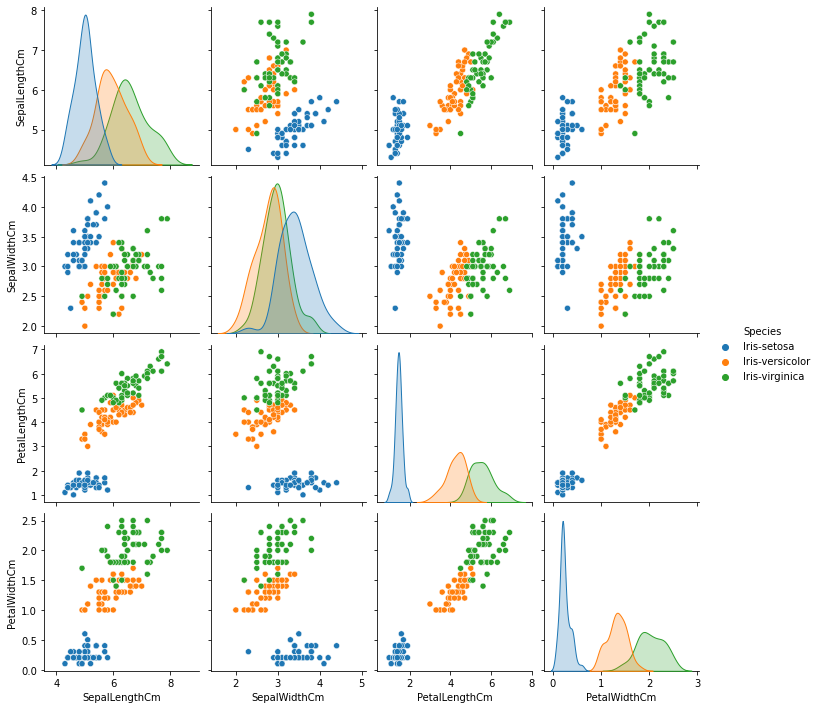

In [15]:
sns.pairplot(data,hue="Species")
plt.show()

#### Join plot

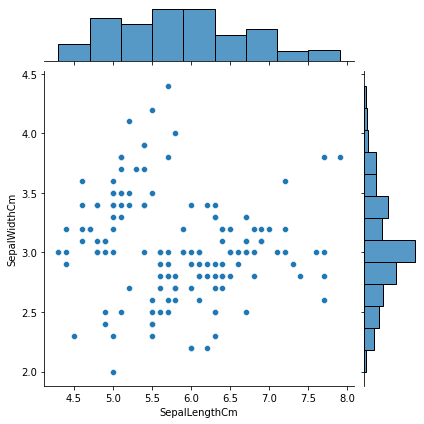

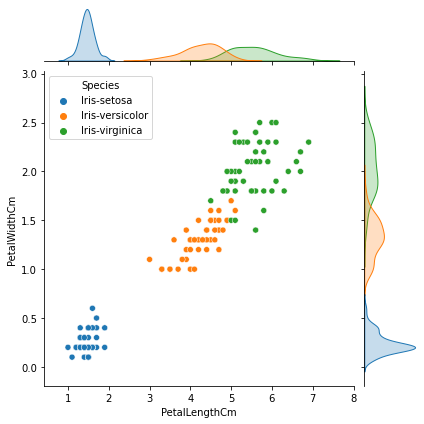

In [16]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=data,) #reprentation of 2D histogram and 2D density plot
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=data,hue='Species')
plt.show()

#### Facegrid

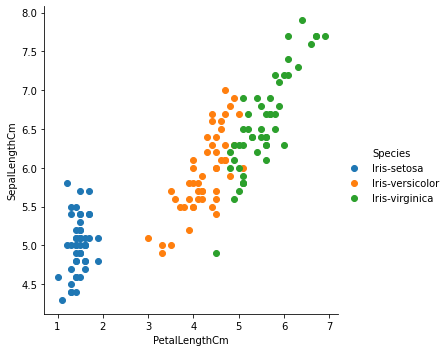

In [17]:
sns.FacetGrid(data,hue='Species',height=5).map(plt.scatter,'PetalLengthCm','SepalLengthCm').add_legend()
plt.show()

#### Heat Map

               SepalLengthCm  SepalWidthCm
SepalLengthCm       1.000000     -0.109369
SepalWidthCm       -0.109369      1.000000


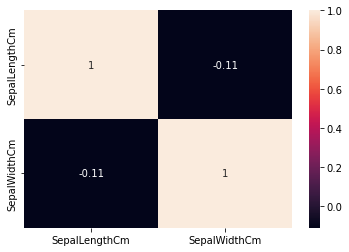

In [18]:
corr_sepal=data[['SepalLengthCm','SepalWidthCm']].corr() #chacking co-relation
print(corr_sepal)
sns.heatmap(corr_sepal,annot=True)
plt.show()

               PetalLengthCm  PetalWidthCm
PetalLengthCm       1.000000      0.962757
PetalWidthCm        0.962757      1.000000


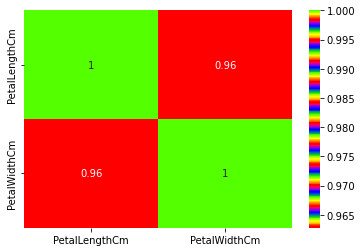

In [19]:
corr_petal=data[['PetalLengthCm','PetalWidthCm']].corr()
print(corr_petal)
sns.heatmap(corr_petal,annot=True,cmap="prism")
plt.show()

### splitting the data into data and labels

In [20]:
X=data.drop('Species',axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
Y=data['Species']
Y.head()    #data is splited in x and y

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### splitting into training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
len(X_train)

120

In [25]:
len(X_test)

30

#### DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
modal=DecisionTreeClassifier() 

In [28]:
modal.fit(X_train,y_train) #its performing drawing devision line and devide the data in two parts

DecisionTreeClassifier()

#### Modal Accuracy

In [29]:
modal.score(X_test,y_test)

0.9666666666666667

#### making prediction 

In [30]:
actual=y_test
predict=modal.predict(X_test)   #predict

#### classification report

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(actual,predict) #gives insights of prediction

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  7]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### Making a prediction model

In [34]:
print("Enter Details For Modal Prediction")
sepal_l=float(input("sepal_length : "))
sepal_w=float(input("sepal_width : "))
petal_l=float(input("petal_length : "))
petal_w=float(input("petal_width : "))
data1=np.array([[sepal_l,sepal_w,petal_l,petal_w]])

Enter Details For Modal Prediction
sepal_length : 5
sepal_width : 2
petal_length : 8
petal_width : 3


In [35]:
pre=modal.predict(data1)
if(pre=='Iris-setosa'):
    print("Iris setosa")
elif(pre=="Iris-virginica"):
    print("Iris virginica")
else:
    print("Iris versicolor")

Iris virginica


#### Plotting the tree

In [36]:
from sklearn import tree
text = tree.export_text(modal)
print(text)  #text repesntation

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [37]:
feature=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target= ['Iris-setosa', 'Iris-versicolor', 'Iris-virg']

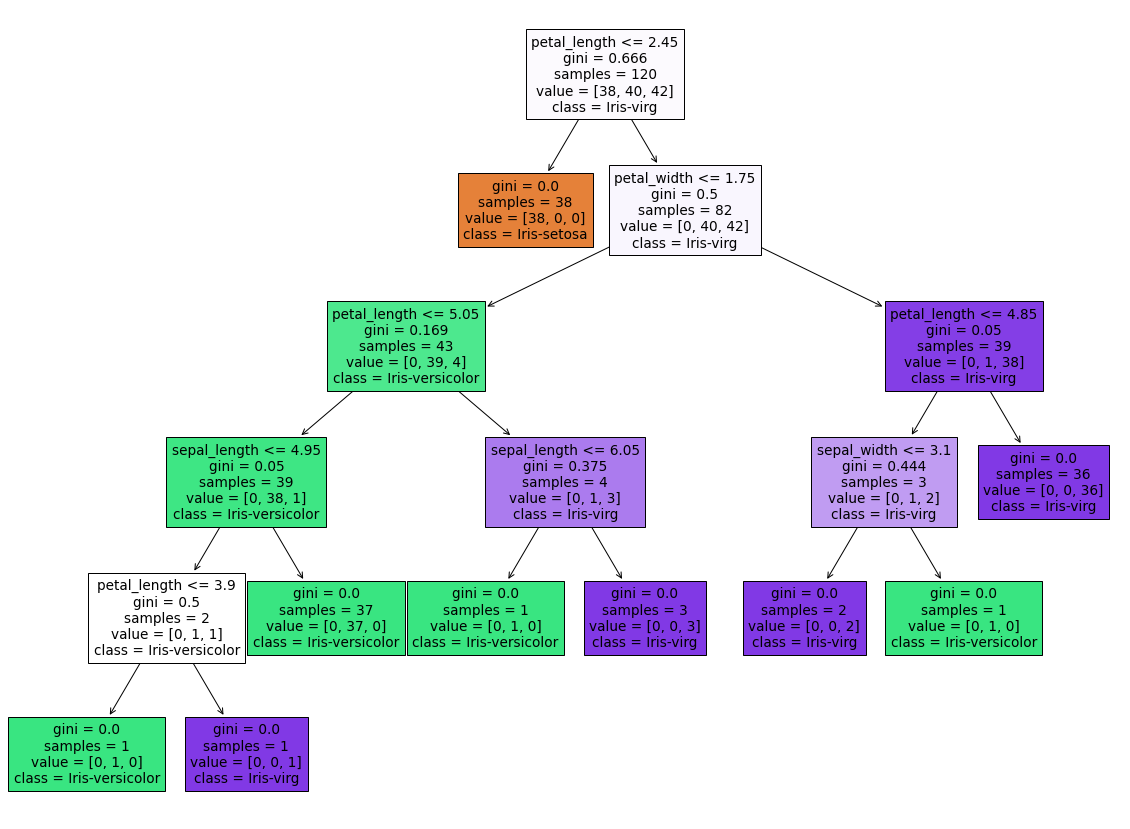

In [38]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(modal, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)